In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

te = r'C:\Users\ilesanmi\Desktop\Test.csv'
tr = r'C:\Users\ilesanmi\Desktop\Train.csv'
ss = r'C:\Users\ilesanmi\Desktop\SampleSubmission.csv'


train = pd.read_csv(tr)
test = pd.read_csv(te)
submissionfile = pd.read_csv(ss)

In [3]:
train['Disposable_Income'].fillna(train['Disposable_Income'].mean(), inplace = True)
test['Disposable_Income'].fillna(test['Disposable_Income'].mean(), inplace = True)


In [4]:
target = train['Response']
features = train.drop(columns = 'Response')
features2 = test

In [31]:
train.shape

(1568, 27)

In [5]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [6]:
features_encoded = features.apply(enc.fit_transform)
features2_encoded = features2.apply(enc.fit_transform)
#target_encoded = enc.fit_transform(target)

In [7]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(features_encoded, target, random_state = 0)


In [8]:
from sklearn.linear_model import LogisticRegression

#log = LogisticRegression()


In [225]:
def Log_reg_accu_display(x_tr, x_test, y_tr, y_test):
    C_values = [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1]
    train_acc = []
    test_acc = []
    f1_val = []
    
    
    for c in C_values:
        
        log_reg1 = LogisticRegression(C = c)
        log_reg1.fit(x_tr, y_tr)
        pred = log_reg1.predict(x_tr)
        print('f1 score of my sample', f1_score(y_tr, pred))
        pred2 = log_reg1.predict(x_te)
        print(' f1 score of my predi',f1_score(y_te, pred2))
        log_reg1.fit(x_tr, y_tr)
        train_acc.append(log_reg1.score(x_tr, y_tr))
        test_acc.append(log_reg1.score(x_test, y_test))
        f1_val.append(pred2)

    #plt.plot(C_values, f1_val)
    #train_acc, test_acc, C_values = Log_reg_Manip(x_tr, x_test, y_tr, y_test)
#     plt.plot(C_values, train_acc, label = "Train Accuracy")
#     plt.plot(C_values, test_acc, label = "Test Accuracy")
#     plt.xlabel('C values')
#     plt.ylabel('Accuracies')
#     plt.legend(loc = 'best')
    #plt.show()

In [40]:
def Log_reg_Manip_display(x_tr, x_test, y_tr, y_test):
    C_values = [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1]
    train_acc = []
    test_acc = []

    for c in C_values:
        log_reg1 = LogisticRegression(C = c)
        log_reg1.fit(x_tr, y_tr)
        train_acc.append(log_reg1.score(x_tr, y_tr))
        test_acc.append(log_reg1.score(x_test, y_test))

    
    #train_acc, test_acc, C_values = Log_reg_Manip(x_tr, x_test, y_tr, y_test)
    plt.plot(C_values, train_acc, label = "Train Accuracy")
    plt.plot(C_values, test_acc, label = "Test Accuracy")
    plt.xlabel('C values')
    plt.ylabel('Accuracies')
    plt.legend(loc = 'best')
    plt.show()
    

    
def logistic_regression_model( x_tr, x_te, y_tr, y_te, x_te_te, C = 1.0):
    log_reg = LogisticRegression(C = C)
    log_reg.fit(x_tr, y_tr)
    print('training accuracy: ', log_reg.score(x_tr, y_tr))
    print('testing accuracy: ', log_reg.score(x_te, y_te))
    
    pred = log_reg.predict(x_tr)
    print('f1 score of my sample', f1_score(y_tr, pred))
    pred2 = log_reg.predict(x_te)
    print(' f1 score of my predi',f1_score(y_te, pred2))
    
    #the koko
    submission_new = submissionfile
    submission_new.Response = log_reg.predict(x_te_te)
    sns.countplot(submission_new.Response)
    
    submission_new.head()
    response = input('wanna save as a doc? ')
    if response == 'y' or response == 'yes':
        doc_name = input('enter doc name: ')
        submission_new.to_csv(doc_name, index = False)
        print('/n saved')
    elif response == 'n' or response == 'no':
        print('Thank you')
    
from sklearn.metrics import confusion_matrix, classification_report

def cls_rprt_and_conf_matrix(x_tr, x_te, y_tr, y_te, C = 1):
    #log_reg = logistic_regression_model( x_tr, x_te, y_tr, y_te, C = 1.0)
    
    #having issue... 
    
    log_reg = LogisticRegression(C = C)
    log_reg.fit(x_tr, y_tr)
    #print('training accuracy: ', log_reg.score(x_tr, y_tr))
    #print('testing accuracy: ', log_reg.score(x_te, y_te))
    
    y_pred = log_reg.predict(x_te)
    #make predictions
    conf =confusion_matrix(y_te, y_pred)
    cls_report = classification_report(y_te, y_pred)
    print('confusion matrix: \n\n', conf, '\n\n')
    print('classification report: \n', cls_report)

In [41]:
from sklearn.metrics import f1_score

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

imbal = train
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

imbal_enc = imbal.apply(enc.fit_transform)
test_enc = test.apply(enc.fit_transform)

In [269]:
def using_smote(encoded_df, label, test_enc, c = 1):
    y = label
    features_enc = encoded_df.drop(y, axis = 'columns')
    target = imbal_enc[y]
    
    smote =SMOTE(sampling_strategy='minority', random_state=3)
    x_sn, y_sn = smote.fit_resample(features_enc, target)
   
    #splitting..
    x_tr, x_te, y_tr, y_te = train_test_split(x_sn, y_sn, random_state = 0)
    
    #scaling
    scaler = MinMaxScaler()
    x_tr_scaled = scaler.fit_transform(x_tr)
    x_test_scaled = scaler.transform(x_te)
    
    x_test_test = scaler.fit_transform(test_enc)
    
    #logistic_regression_model(x_tr_scaled, x_test_scaled, y_tr, y_te, x_test_test, C = c)
    Log_reg_Manip_display(x_tr_scaled, x_test_scaled, y_tr, y_te)
    cls_rprt_and_conf_matrix(x_tr_scaled, x_test_scaled, y_tr, y_te)
    
    
    
#     pred2 = log.predict(x_test_test)
#     print(f1_score(y_te, pred2))

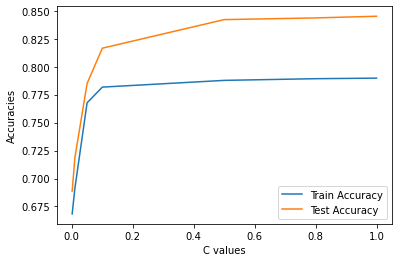

confusion matrix: 

 [[273  49]
 [ 54 289]] 


classification report: 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       322
           1       0.86      0.84      0.85       343

    accuracy                           0.85       665
   macro avg       0.84      0.85      0.85       665
weighted avg       0.85      0.85      0.85       665



In [270]:
t = 'Response'
using_smote(imbal_enc, t, test_enc, c = 1)

In [50]:
#trying the other method of increasing the minority to have more data train the model

In [334]:
def oversampling_d_minority_class(encoded_df, test_enc, label):
    y = label
    zeros = encoded_df[encoded_df[y] == 0] #the oversampled
    ones = encoded_df[encoded_df[y] == 1] #the undersampled
    
    zeros_count, ones_count = encoded_df[y].value_counts()
    
    #undersampling the zeros to same values as 1's
    zeros.sample(ones_count).shape #brought zeros to same values as 1's

    ones_oversampled = ones.sample(zeros_count, replace = True, random_state = 9) 
    
    #so, for oversampling, i have
    print('now equally scaled as: ', zeros.shape , ones_oversampled.shape)
    print('\n')
    #concatenating -- the new scaled dataframe:
    dataframe_new = pd.concat([zeros, ones_oversampled], axis = 0)
    
    print('shape of new equally scaled new dataframe: \n', dataframe_new.shape)
    print('\n')
    y = label
    features = dataframe_new.drop(y, axis = 1)
    target = dataframe_new[y]
    
    #splitting
    x_tr, x_test, y_tr, y_test = train_test_split(features, target, random_state=5)
    
    #scaling
    scaler = MinMaxScaler()
    x_tr_scaled = scaler.fit_transform(x_tr)
    x_test_scaled = scaler.transform(x_test)
    
    x_test_test = scaler.fit_transform(test_enc)
    
    logistic_regression_model(x_tr_scaled, x_test_scaled, y_tr, y_test, x_test_test, C = 0.97)
    Log_reg_Manip_display(x_tr_scaled, x_test_scaled, y_tr, y_test)
    cls_rprt_and_conf_matrix(x_tr_scaled, x_test_scaled, y_tr, y_test)

In [335]:
def modified2(encoded_df, test_enc, label):
    y = label
    zeros = encoded_df[encoded_df[y] == 0] #the oversampled
    ones = encoded_df[encoded_df[y] == 1] #the undersampled
    
    zeros_count, ones_count = encoded_df[y].value_counts()
    
    #undersampling the zeros to same values as 1's
    zeros.sample(ones_count).shape #brought zeros to same values as 1's
    
    rand = [1,2,3,4,5,6,7,8,9,10]
    ones_oversampled = []
    for i in rand:
        r = ones.sample(zeros_count, replace = True, random_state = i)
        ones_oversampled.append(r)
    
    #so, for oversampling, i have
    for j in ones_oversampled:
        print('now equally scaled as: ', zeros.shape , j.shape)
        print('\n')
    #concatenating -- the new scaled dataframe:
        dataframe_new = pd.concat([zeros, j], axis = 0)
    
        print('shape of new equally scaled new dataframe: \n', dataframe_new.shape)
        print('\n')
        y = label
        features = dataframe_new.drop(y, axis = 1)
        target = dataframe_new[y]
    
    #splitting
        x_tr, x_test, y_tr, y_test = train_test_split(features, target, random_state=5)
    
    #scaling
        scaler = MinMaxScaler()
        x_tr_scaled = scaler.fit_transform(x_tr)
        x_test_scaled = scaler.transform(x_test)
    
        x_test_test = scaler.fit_transform(test_enc)
    
        #logistic_regression_model(x_tr_scaled, x_test_scaled, y_tr, y_test, x_test_test, C = 0.5)
        Log_reg_Manip_display(x_tr_scaled, x_test_scaled, y_tr, y_test)
        #cls_rprt_and_conf_matrix(x_tr_scaled, x_test_scaled, y_tr, y_test)

In [336]:
#modified2(imbal_enc, test_enc, t)

now equally scaled as:  (1329, 27) (1329, 27)


shape of new equally scaled new dataframe: 
 (2658, 27)




C:\Users\ilesanmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


training accuracy:  0.8324134470647265
testing accuracy:  0.8330827067669173
f1 score of my sample 0.8271221532091098
 f1 score of my predi 0.8374816983894583
wanna save as a doc? y
enter doc name: r=5,c=.5
/n saved


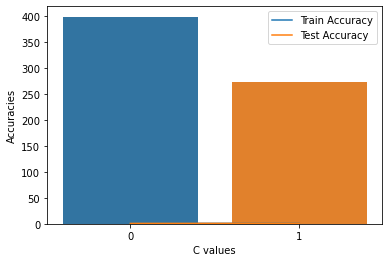

confusion matrix: 

 [[268  46]
 [ 65 286]] 


classification report: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       314
           1       0.86      0.81      0.84       351

    accuracy                           0.83       665
   macro avg       0.83      0.83      0.83       665
weighted avg       0.83      0.83      0.83       665



In [339]:
oversampling_d_minority_class(imbal_enc, test_enc, t)

In [306]:
#function receives encoded dataframe and then the needed label

def udersampling_d_majority_class(encoded_df, label, test_enc):
    y = label
    zeros = encoded_df[encoded_df[y] == 0] #the oversampled
    ones = encoded_df[encoded_df[y] == 1] #the undersampled
    
    zeros_count, ones_count = encoded_df[y].value_counts()
    
    #undersampling the zeros to same values as 1's
    zero_datas = zeros.sample(ones_count, random_state = 11) #brought zeros to same values as 1's
    #OBSERVATION: AT DIFFERENT VALUE OF THE RANDOM_STATE, I GET DIFFERENT..
    #...RESULTS
    
    
    #so, for underscaling, i have
    print('now equally scaled as: ', zero_datas.shape , ones.shape)
    print('\n')
    #concatenating -- the new scaled dataframe:
    dataframe_new = pd.concat([zero_datas, ones], axis = 0)
    
    print('shape of new equally scaled new dataframe: \n', dataframe_new.shape)
    print('\n')
    
    #dataframe_new.head()
    
    y = label
    features = dataframe_new.drop(y, axis = 1)
    target = dataframe_new[y]
    
    #splitting
    x_tr, x_test, y_tr, y_test = train_test_split(features, target, random_state=0)
    
    #scaling
    scaler = MinMaxScaler()
    x_tr_scaled = scaler.fit_transform(x_tr)
    x_test_scaled = scaler.transform(x_test)
    
    x_test_test = scaler.fit_transform(test_enc)

    logistic_regression_model(x_tr_scaled, x_test_scaled, y_tr, y_test, x_test_test, C=0.08) #i can input C value too
    Log_reg_Manip_display(x_tr_scaled, x_test_scaled, y_tr, y_test)
    cls_rprt_and_conf_matrix(x_tr_scaled, x_test_scaled, y_tr, y_test)

    

In [307]:
#function receives encoded dataframe and then the needed label

def modified(encoded_df, label, test_enc):
    y = label
    zeros = encoded_df[encoded_df[y] == 0] #the oversampled
    ones = encoded_df[encoded_df[y] == 1] #the undersampled
    
    zeros_count, ones_count = encoded_df[y].value_counts()
    
    #undersampling the zeros to same values as 1's
    rand = [1,2,3,4,5,6,7,8,9,10,11,12,13]
    zero_datas = []
    for i in rand:
        r = zeros.sample(ones_count, random_state = i) #brought zeros to same values as 1's
        zero_datas.append(r)
    #OBSERVATION: AT DIFFERENT VALUE OF THE RANDOM_STATE, I GET DIFFERENT..
    #...RESULTS
    
    for j in zero_datas:
        
    #so, for underscaling, i have
        print('now equally scaled as: ', j.shape , ones.shape)
        print('\n')
    #concatenating -- the new scaled dataframe:
        dataframe_new = pd.concat([j, ones], axis = 0)
    
        print('shape of new equally scaled new dataframe: \n', dataframe_new.shape)
        print('\n')
    
    #dataframe_new.head()
    
        y = label
        features = dataframe_new.drop(y, axis = 1)
        target = dataframe_new[y]
    
    #splitting
        x_tr, x_test, y_tr, y_test = train_test_split(features, target, random_state=0)
    
    #scaling
        scaler = MinMaxScaler()
        x_tr_scaled = scaler.fit_transform(x_tr)
        x_test_scaled = scaler.transform(x_test)
    
        x_test_test = scaler.fit_transform(test_enc)

    #Log_reg_accu_display(x_tr_scaled, x_test_scaled, y_tr, y_test)
        #logistic_regression_model(x_tr_scaled, x_test_scaled, y_tr, y_test, x_test_test, C=0.82) #i can input C value too
        Log_reg_Manip_display(x_tr_scaled, x_test_scaled, y_tr, y_test)
        #cls_rprt_and_conf_matrix(x_tr_scaled, x_test_scaled, y_tr, y_test)

    

In [308]:
#modified(imbal_enc, t, test_enc)

now equally scaled as:  (239, 27) (239, 27)


shape of new equally scaled new dataframe: 
 (478, 27)


training accuracy:  0.776536312849162
testing accuracy:  0.7916666666666666
f1 score of my sample 0.7604790419161677
 f1 score of my predi 0.7826086956521738


C:\Users\ilesanmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


wanna save as a doc? y
enter doc name: at r = 1, c = 0.8
/n saved


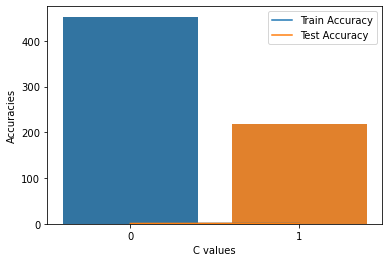

confusion matrix: 

 [[51  6]
 [13 50]] 


classification report: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        57
           1       0.89      0.79      0.84        63

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.84      0.84       120



In [318]:
udersampling_d_majority_class(imbal_enc, t, test_enc)

In [294]:
#got my 11th at random_state = 2
#where accuracy == 0.85

#got my 15th at random state = 8, c = 0.1